<a href="https://colab.research.google.com/github/prince848/SharkAttack-Case-Study/blob/main/sharkattackClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import xlrd

In [ ]:
import missingno

In [ ]:
import os
df=pd.read_csv("/content/drive/MyDrive/Shark attack/GSAF5.csv")

In [ ]:
file_list = [f for f in df]
print(file_list)

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


## ***CASE NUMBER***

In [ ]:
print(df['Case Number'].equals(df['Case Number.1']))
print(df['Case Number.1'].equals(df['Case Number.2']))
print(df['Case Number'].equals(df['Case Number.2']))
case_number=df[["Case Number","Case Number.1","Case Number.2"]]
# not_equal = case_number[case_number["Case Number"]!=case_number["Case Number.1"]]
not_equal = case_number[case_number["Case Number"]!=case_number["Case Number.2"]]
#not_equal = case_number[case_number["Case Number.1"]!=case_number["Case Number.2"]]
display(not_equal)

False
False
False


,Case Number,Case Number.1,Case Number.2
83,NaN,2021.01.13.b,2021.01.13.b
164,2020.05.26,NaN,NaN
766,2015.07-10,2015.07.10,2015.07.10
5340,1934.01.08.R,1934.02.08.R,1934.02.08.R
5879,NaN,1905.09.06.R,1905.09.06.R
...,...,...,...
25822,NaN,NaN,NaN
25823,NaN,NaN,NaN
25824,NaN,NaN,NaN
25825,NaN,NaN,NaN


In [ ]:
df['Case Number.1'].isin(df['Case Number.2']).value_counts()

True     25789
False       38
Name: Case Number.1, dtype: int64

In [ ]:
df = df.drop(columns=["Case Number"])

In [ ]:
case_number2=df[["Case Number.1","Case Number.2"]]
not_equal = case_number2[case_number2["Case Number.1"]!=case_number2["Case Number.2"]]
display(not_equal)

,Case Number.1,Case Number.2
6,2021. 08.21,2021.08.21
9,2021..08.07.b,2021.08.07.b
10,2021.08.07.a,2021..08.07.a
73,2021.02.20,2021.02.21
81,2021.01.22.a,2021.01.22
...,...,...
25822,NaN,NaN
25823,NaN,NaN
25824,NaN,NaN
25825,NaN,NaN


In [ ]:
df = df.drop(columns=["Case Number.1"])

In [ ]:
df.rename(columns={"Case Number.2":"Case Number"}, inplace=True)


In [ ]:
df['Case Number'] = df['Case Number'].replace(",",".",regex=False)

In [ ]:
df.rename(columns={"Sex ":"Sex"}, inplace=True)
df.rename(columns={"Species ":"Species"}, inplace=True)

In [ ]:
df=df[["Case Number","Date","Year","Sex","Type","Species","Country", "Area", "Location", "Activity", "Age", "Fatal (Y/N)", "Time"]]

In [ ]:
df.columns.drop_duplicates()

Index(['Case Number', 'Date', 'Year', 'Sex', 'Type', 'Species', 'Country',
       'Area', 'Location', 'Activity', 'Age', 'Fatal (Y/N)', 'Time'],
      dtype='object')

## ***COLUMN AGE***

In [ ]:
df['Age'].value_counts().sample(20)

29                  84
56                  12
33                  47
2 to 3 months        1
30                  81
48                  32
Teens                1
50 & 30              1
70                  10
MAKE LINE GREEN      1
17                 167
19                 148
86                   1
>50                  1
teen                 5
6                   15
23 & 20              1
 28                  1
60s                  3
34 & 19              1
Name: Age, dtype: int64

In [ ]:
df['Age'].replace(to_replace=['Teen','teen'],value='16',inplace=True)
df['Age'].replace(to_replace='30s',value='35',inplace=True)
df['Age'].replace(to_replace='20s',value='25',inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')
df['Age'].value_counts().head(20)

17.0    167
16.0    160
18.0    155
19.0    148
20.0    147
15.0    146
25.0    125
21.0    124
22.0    119
14.0    111
24.0    110
13.0     99
26.0     90
23.0     87
35.0     85
28.0     85
12.0     84
29.0     84
30.0     82
27.0     82
Name: Age, dtype: int64

 ## ***Column Country***

In [ ]:
filtered = df[(df['Country'].isnull())]

print(filtered.shape)

(19177, 13)


In [ ]:
df['Country'] = df['Country'].str.replace('ENGLAND', 'UNITED KINGDOM')
df['Country'] = df['Country'].str.replace('SCOTLAND', 'UNITED KINGDOM')

filtered = df[(df['Country']=="UNITED KINGDOM")]
print(filtered.shape)
filtered.head()

(43, 13)


,Case Number,Date,Year,Sex,Type,Species,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
43,2021.06.12,12-Jun-2021,2021.0,M,Provoked,"Tope shark, 6'",UNITED KINGDOM,West Sussex,Littlehampton,Fishing,51.0,N,NaN
384,2018.05.13.a,13-May-2018,2018.0,M,Invalid,Invalid incident,UNITED KINGDOM,Cornwall,Off Land's End,Fishing,21.0,N,08h15
509,2017.06.07.R,Reported 07-Jun-2017,2017.0,M,Unprovoked,"3m shark, probably a smooth hound",UNITED KINGDOM,South Devon,Bantham Beach,Surfing,30.0,N,NaN
1125,2012.08.31,31-Aug-2012,2012.0,M,Provoked,"Porbeagle shark, 7'",UNITED KINGDOM,Inner Hebrides,Off the Isle of Islay,Shark fishing,53.0,N,NaN
1224,2011.10.28.R,Reported 28-Oct-2011,2011.0,M,Unprovoked,8' to 10' shark,UNITED KINGDOM,Moray,Spey Bay,Surfing,26.0,N,NaN


In [ ]:
COUNTRIES= ["UNITED KINGDOM","MALTA","NEW ZEALAND","FRANCE","CHINA","JAPAN","ITALY","SINGAPORE","AUSTRALIA","USA","CANADA","IRELAND","SOUTH AFRICA", "GERMANY"]
df= df.loc[df["Country"].isin(COUNTRIES)]

In [ ]:
counts=df['Country'].value_counts()
display(counts)

USA               2428
AUSTRALIA         1429
SOUTH AFRICA       589
NEW ZEALAND        139
ITALY               72
UNITED KINGDOM      43
JAPAN               35
CANADA              13
FRANCE              13
CHINA                9
SINGAPORE            6
MALTA                5
IRELAND              2
Name: Country, dtype: int64

## ***COLUMN FATAL***

In [ ]:
df["Fatal (Y/N)"].value_counts()

N          3645
Y           671
UNKNOWN      45
 N            5
Y x 2         1
Nq            1
N             1
F             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [ ]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip()

In [ ]:
def FATAL(f): 
    if f not in ["N", "Y"]: 
        return 'Unknown'
    else: 
        return f
    
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(FATAL)
df["Fatal (Y/N)"].value_counts()

N          3651
Y           671
Unknown     461
Name: Fatal (Y/N), dtype: int64

## ***Column type***

In [ ]:
df["Type"] = df["Type"].str.strip() 
df["Type"].value_counts()

Unprovoked             3480
Provoked                483
Invalid                 416
Watercraft              305
Sea Disaster             72
Questionable             10
Boat                      4
Unconfirmed               1
Unverified                1
Under investigation       1
Name: Type, dtype: int64

In [ ]:
df["Type"] = df["Type"].str.replace('Invalid', 'Unspecified').str.replace('Questionable', 'Unspecified').str.replace('Unconfirmed', 'Unspecified').str.replace('Unverified', 'Unspecified').str.replace('Under investigation', 'Unspecified')


In [ ]:
df["Type"] = df["Type"].str.replace('Sea Disaster', 'Unprovoked')
df["Type"] = df["Type"].str.replace('Boat', 'Provoked').str.replace('Watercraft','Provoked')

In [ ]:
df["Type"].value_counts()

Unprovoked     3552
Provoked        792
Unspecified     429
Name: Type, dtype: int64

## ***Column time***

In [ ]:
df['Time'] = df['Time'].str.strip()
df['Time'] = df['Time'].str.lower()
df.loc[df['Time'].notnull(),'Time'].sample(20)

1608             14h30
4946         afternoon
930              11h30
2277             13h20
4301    late afternoon
2599             08h30
2597             18h00
2734             08h30
1297            midday
3974             14h00
635              14h55
1661         afternoon
1950             11h30
1032             15h20
777              14h40
3633         afternoon
1916             18h00
3118             18h45
1006             12h00
912      07h00 - 08h00
Name: Time, dtype: object

In [ ]:
df.loc[(df['Time'].notnull()) & (df['Time'].str.fullmatch('[a-zA-Z]{3,}')),'Time'].value_counts()

afternoon    166
morning       97
night         46
evening       25
dusk          13
midday         6
sunset         6
midnight       2
dawn           2
dark           1
lunchtime      1
nightfall      1
daytime        1
noon           1
daybreak       1
Name: Time, dtype: int64

In [ ]:
df['Time'].replace(['.*evening.*','.*dusk.*',
                         '.*dark.*','.*night.*'],'night',regex=True,inplace=True)

df['Time'].replace(['pm','p\.m\.','.*midday.*','.*sunset.*','.*lunchtime.*',
                         '.*noon.*','.*daytime.*','.*afternoon.*'],'afternoon',regex=True,inplace=True)

df['Time'].replace(['a\.m\.''am','.*dawn.*',
                         '.*daybreak.*','.*morning.*'],'day-morning',regex=True,inplace=True)

In [ ]:
df.loc[(df['Time'].notnull()) & (df['Time'].str.fullmatch('\w{3,}')),'Time'].value_counts()

afternoon    224
11h00        105
night         98
16h00         95
14h00         93
            ... 
13h06          1
10h47          1
15h53          1
11h06          1
17h42          1
Name: Time, Length: 262, dtype: int64

In [ ]:
#grouping 06:00 to 11:59 as day-morning 
df['Time'].replace(to_replace='.*0[6-9].?\d{2}.*',value='day-morning',regex=True,inplace=True)
df['Time'].replace(to_replace='.*1[0-1].?\d{2}.*',value='day-morning',regex=True,inplace=True)
#grouping 12:00 to 17:59 as afternoon
df['Time'].replace(to_replace='.*1[2-7].?\d{2}.*',value='afternoon',regex=True,inplace=True)
#grouping 18:00 to 23:59 as night
df['Time'].replace(to_replace='.*1[8-9].?\d{2}.*',value='night',regex=True,inplace=True)
df['Time'].replace(to_replace='.*2[0-3].?\d{2}.*',value='night',regex=True,inplace=True)
#grouping 00:00 to 05:59 as night-morning
df['Time'].replace(to_replace='.*0[0-5].?\d{2}.*',value='night-morning',regex=True,inplace=True)

In [ ]:
df[~df['Time'].isin(['day-morning','night-morning','night','afternoon'])]['Time'].count()

24

In [ ]:
df.loc[~df['Time'].isin(['day-morning','night-morning','night','afternoon']),'Time'] = np.nan

In [ ]:
df['Time'].value_counts(dropna=False)

NaN              2131
afternoon        1453
day-morning       863
night             305
night-morning      31
Name: Time, dtype: int64

In [ ]:
df['Time']= df['Time'].fillna("Unspecified")

## ***Column Activity***

In [ ]:
df['Activity'].replace(['JUMPING','STANDING','WADING','WALKING','PLAYING','SPLASHING','DANGLING FEET IN THE WATER'],'BATHING',inplace=True)
df['Activity'].replace(['BODY SURFING','BOOGIE BOARDING','BODY-BOARDING'],'BODY BOARDING',inplace=True)
df['Activity'].replace('.*SPEARFISHING.*','SPEARFISHING',regex=True,inplace=True)
df['Activity'].replace('.*DIVING.*','DIVING',regex=True,inplace=True)
df['Activity'].replace(['.*SURFING','KITE BOARDING','.*SKIING'],'SURFING',regex=True,inplace=True)
df['Activity'].replace(['.*KAYAK.*','.*BOAT.*','CANOEING','ROWING','SAILING','FISHING FOR MACKEREL'],'ON BOAT',regex=True,inplace=True)
df['Activity'].replace(['TREADING WATER','FLOATING ON HIS BACK'],'FLOATING',inplace=True)
df['Activity'].replace(['.*OVERBOARD.*','JUMPED INTO THE WATER'],'FELL INTO THE WATER',regex=True,inplace=True)
df['Activity'].replace('FREEDOM SWIMMING','SWIMMING',inplace=True)
df['Activity'].replace('SURF FISHING','WADE FISHING',inplace=True)
df['Activity'].replace(['SITTING ON SURFBOARD','SURFING (SITTING ON HIS BOARD)','PADDLE BOARDING','STAND-UP PADDLEBOARDING','PADDLING ON SURFBOARD'],'ON SURFBOARD',inplace=True)
df['Activity'].replace(['.{,30} SHARK.','SHARK RELATED ACTIVITY.*'],'SHARK RELATED ACTIVITY',regex=True,inplace=True)

In [ ]:
mask =df['Activity'].value_counts().loc[df['Activity'].value_counts() < 5].index
df.loc[df['Activity'].isin(mask),'Activity'] = 'OTHER'
df['Activity'].value_counts().head(30)

OTHER              1136
Surfing             971
Swimming            634
Fishing             345
Spearfishing        205
Wading              144
Bathing             103
Standing             94
Diving               73
Snorkeling           69
Scuba diving         56
Body boarding        48
Body surfing         45
Boogie boarding      39
Swimming             36
Kayaking             35
Treading water       31
Pearl diving         28
Free diving          22
Walking              16
Boogie Boarding      16
Surf fishing         14
Windsurfing          13
Surf-skiing          13
Fishing              13
Canoeing             13
Shark fishing        12
Rowing               12
Surf skiing          12
Fell overboard       11
Name: Activity, dtype: int64

## ***Column Species***

In [ ]:
df['Species'] = df['Species'].str.upper()
df['Species'].replace(['.*UNCONFIRMED.*','.* NOT CONFIRMED.*',
                                '.*QUESTIONABLE.*', '.*FOOT SHARK.*',
                                '.*SMALL SHARK.*', '.*FROM SHARK.*',
                                '.*FEMALE SHARK.*', '.*LARGE SHARK.*',
                                '.*BUT SHARK.*', '.*JUVENILE SHARK.*',
                                '.*THE SHARK.*','.*TWO SHARK.*',
                                '.*ANOTHER SHARK.*','.*KG SHARK.*',
                                '.*SEVERAL SHARK.*','.*SAME SHARK.*',
                                '.*GROUND SHARK.*'],
                               np.nan,regex=True,inplace=True)

In [ ]:
df['Species'] = df[df['Species'].notnull()]['Species'].str.findall('\w{3,} SHARK')
df['Species'] = df['Species'].apply(lambda x : ' OR '.join(x) if x == x else x)

In [ ]:
df.loc[df['Species'] == df['Species'], 'Species']
df.loc[df['Species'].notnull() & df['Species'].str.contains(' OR '),'Species'] = np.nan
df.loc[df['Species'] == '','Species'] = np.nan

In [ ]:
df['Species'].value_counts().head(20)

WHITE SHARK          610
TIGER SHARK          187
BULL SHARK           118
NURSE SHARK           91
WHALER SHARK          66
BLACKTIP SHARK        63
SPINNER SHARK         47
WOBBEGONG SHARK       46
RAGGEDTOOTH SHARK     43
MAKO SHARK            43
HAMMERHEAD SHARK      37
REEF SHARK            33
BLUE SHARK            30
SANDTIGER SHARK       22
LEMON SHARK           21
SAND SHARK            17
ZAMBESI SHARK         14
SEVENGILL SHARK       11
DUSKY SHARK           10
GILL SHARK             8
Name: Species, dtype: int64

In [ ]:
df['Species'].isna().sum()

3165

In [ ]:
df['Species'].fillna('Unknown',inplace=True)

## ***Column Area***

In [ ]:
df['Area'].value_counts()

Florida                                 1128
New South Wales                          511
Queensland                               339
Hawaii                                   326
California                               311
                                        ... 
Argyll                                     1
Isle of Man                                1
Territory of Cocos (Keeling) Islands       1
Ibaraki Prefecture                         1
Bonin Islands                              1
Name: Area, Length: 203, dtype: int64

In [ ]:
df["Area"]= df["Area"].fillna("Unspecified")

In [ ]:
count = df['Area'].value_counts()
count[count > 25]
df=df[df['Area'].isin(count[count >25].index)]
df["Area"].value_counts()

Florida                  1128
New South Wales           511
Queensland                339
Hawaii                    326
California                311
KwaZulu-Natal             217
Western Australia         213
Western Cape Province     195
Eastern Cape Province     166
South Carolina            165
North Carolina            116
South Australia           108
Victoria                   92
Texas                      77
North Island               74
Torres Strait              70
New Jersey                 54
Unspecified                52
Tasmania                   44
South Island               41
New York                   33
Oregon                     31
Name: Area, dtype: int64

## ***COLUMN DATE***

In [ ]:
def find_month(string):
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    #If it founds the info of a month, it returns it as an output of this cleaning function
    try:
        for month in months:
            if re.search(month,string):
                return month
    except TypeError:
        pass

df['Month'] = df['Date']    
df['Month'] = df['Date'].apply(find_month)
df['Month'].fillna(value="Unk",inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [ ]:
df['Date'].sample(20)

4731             27-Jun-1954
6396             28-Mar-1855
551              11-Feb-2017
6575           Ca. 1010  BC 
5079               Fall 1943
811              11-Apr-2015
3302             20-Aug-1983
750              22-Aug-2015
21               21-Jul-2021
6174    Reported 18-Dec-1883
1330             15-Jan-2011
2189             11-Nov-2002
936              04-May-2014
6105             22-Nov-1889
528              17-Apr-2017
2345             02-Apr-2001
1580             09-Sep-2008
907              14-Jul-2014
4949                    1948
4796             27-Jul-1952
Name: Date, dtype: object

In [ ]:
df['Date'] = df['Date'].str.upper()
df['Date'] = df['Date'].str.lstrip('REPORTED ')
df['Date'] = pd.to_datetime(df['Date'],errors='coerce', format='%d-%b-%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df.loc[df['Date'].notnull(),'Date'].sample(20)

5585   1923-12-02
2373   2000-10-20
4300   1961-03-30
3967   1966-05-20
2478   1999-09-10
5582   1924-01-25
4844   1951-01-03
3460   1980-01-10
1646   2008-04-20
4984   1946-10-14
2058   2004-04-05
2119   2003-09-14
1407   2010-04-28
2860   1993-08-12
340    2018-09-08
4234   1962-01-14
6190   1882-05-14
5788   1910-12-23
5948   1900-08-21
984    2013-10-26
Name: Date, dtype: datetime64[ns]

## ***COLUMN YEAR***

In [ ]:
df[df['Year'].notnull()]['Year'].value_counts().head(10)

2015.0    114
2016.0     99
2014.0     98
2012.0     95
2017.0     94
2008.0     88
2013.0     88
2007.0     86
2009.0     84
2005.0     82
Name: Year, dtype: int64

In [ ]:
df['Year'].replace(0,np.nan,inplace=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')
df['Year'].value_counts().head(20)

2015.0    114
2016.0     99
2014.0     98
2012.0     95
2017.0     94
2008.0     88
2013.0     88
2007.0     86
2009.0     84
2005.0     82
2018.0     81
2006.0     80
2019.0     80
2011.0     78
2000.0     74
2020.0     74
2001.0     73
2003.0     72
2021.0     67
2004.0     64
Name: Year, dtype: int64

## ***Column Sex***

In [ ]:
df['Sex'].value_counts()

M      3547
F       499
M         2
N         1
lli       1
Name: Sex, dtype: int64

In [ ]:
df['Sex'] = df['Sex'].str.strip()
df['Sex'].replace(['N','.','lli'],np.nan,inplace=True)
df['Sex'].value_counts()

M    3549
F     499
Name: Sex, dtype: int64

## ***Column Activity***

In [ ]:
df['Activity'] = df['Activity'].str.strip()
df['Activity'] = df['Activity'].str.upper()
df['Activity'].value_counts().head(20)

OTHER              1000
SURFING             957
SWIMMING            605
FISHING             302
SPEARFISHING        190
WADING              134
BATHING              92
STANDING             88
SNORKELING           64
DIVING               61
BODY BOARDING        54
BOOGIE BOARDING      51
SCUBA DIVING         50
BODY SURFING         43
KAYAKING             34
TREADING WATER       30
PEARL DIVING         26
SURF SKIING          21
FREE DIVING          21
WALKING              16
Name: Activity, dtype: int64

In [ ]:
df['Activity'].replace(['JUMPING','STANDING','WADING','WALKING','PLAYING','SPLASHING','DANGLING FEET IN THE WATER'],'BATHING',inplace=True)
df['Activity'].replace(['BODY SURFING','BOOGIE BOARDING','BODY-BOARDING'],'BODY BOARDING',inplace=True)
df['Activity'].replace('.*SPEARFISHING.*','SPEARFISHING',regex=True,inplace=True)
df['Activity'].replace('.*DIVING.*','DIVING',regex=True,inplace=True)
df['Activity'].replace(['.*SURFING','KITE BOARDING','.*SKIING'],'SURFING',regex=True,inplace=True)
df['Activity'].replace(['.*KAYAK.*','.*BOAT.*','CANOEING','ROWING','SAILING','FISHING FOR MACKEREL'],'ON BOAT',regex=True,inplace=True)
df['Activity'].replace(['TREADING WATER','FLOATING ON HIS BACK'],'FLOATING',inplace=True)
df['Activity'].replace(['.*OVERBOARD.*','JUMPED INTO THE WATER'],'FELL INTO THE WATER',regex=True,inplace=True)
df['Activity'].replace('FREEDOM SWIMMING','SWIMMING',inplace=True)
df['Activity'].replace('SURF FISHING','WADE FISHING',inplace=True)
df['Activity'].replace(['SITTING ON SURFBOARD','SURFING (SITTING ON HIS BOARD)','PADDLE BOARDING','STAND-UP PADDLEBOARDING','PADDLING ON SURFBOARD'],'ON SURFBOARD',inplace=True)
df['Activity'].replace(['.{,30} SHARK.','SHARK RELATED ACTIVITY.*'],'SHARK RELATED ACTIVITY',regex=True,inplace=True)

In [ ]:
mask = df['Activity'].value_counts().loc[df['Activity'].value_counts() < 5].index
df.loc[df['Activity'].isin(mask),'Activity'] = 'OTHER'
df['Activity'].value_counts().head(30)

SURFING                   1009
OTHER                     1000
SWIMMING                   605
BATHING                    338
FISHING                    302
SPEARFISHING               193
DIVING                     178
BODY BOARDING              148
ON BOAT                     80
SNORKELING                  64
FLOATING                    46
ON SURFBOARD                35
FELL INTO THE WATER         16
WADE FISHING                14
SHARK FISHING               10
SHARK RELATED ACTIVITY       6
Name: Activity, dtype: int64

## ***Exporting***

In [ ]:
df.drop(columns=['Location','Case Number'])

,Date,Year,Sex,Type,Species,Country,Area,Activity,Age,Fatal (Y/N),Time,Month
1,2021-09-09,2021.0,M,Unprovoked,Unknown,USA,Florida,SURFING,NaN,N,afternoon,Sep
2,2021-09-05,2021.0,M,Unprovoked,Unknown,AUSTRALIA,New South Wales,SURFING,31.0,Y,day-morning,Sep
4,2021-08-28,2021.0,M,Unprovoked,Unknown,USA,Texas,BODY BOARDING,NaN,N,day-morning,Aug
6,2021-08-21,2021.0,M,Unprovoked,BULL SHARK,USA,Florida,SURFING,41.0,N,day-morning,Aug
8,2021-08-07,2021.0,M,Provoked,Unknown,AUSTRALIA,Queensland,OTHER,NaN,N,Unspecified,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...
6693,NaT,NaN,M,Unprovoked,Unknown,AUSTRALIA,Unspecified,FISHING,NaN,Y,Unspecified,Unk
6694,NaT,NaN,M,Unprovoked,Unknown,AUSTRALIA,New South Wales,SWIMMING,NaN,Y,Unspecified,Unk
6695,NaT,NaN,M,Unprovoked,Unknown,AUSTRALIA,Western Australia,DIVING,NaN,Y,Unspecified,Unk
6696,NaT,NaN,M,Unprovoked,Unknown,AUSTRALIA,Western Australia,DIVING,NaN,Y,Unspecified,Unk


In [ ]:
dfinal = df.sort_values('Country',ascending=True)

display(dfinal)

,Case Number,Date,Year,Sex,Type,Species,Country,Area,Location,Activity,Age,Fatal (Y/N),Time,Month
1544,2009.01.18,2009-01-18,2009.0,M,Provoked,WHITE SHARK,AUSTRALIA,Victoria,Off Tower Hill,FISHING,NaN,N,day-morning,Jan
5452,1929.12.03.R,1929-12-03,1929.0,M,Unprovoked,Unknown,AUSTRALIA,Queensland,Townsville,NaN,NaN,Y,Unspecified,Dec
5455,1929.10.20,1929-10-20,1929.0,M,Unprovoked,Unknown,AUSTRALIA,Torres Strait,Near Badu Island,DIVING,NaN,N,Unspecified,Oct
5457,1929.09.01,1929-09-01,1929.0,M,Unprovoked,Unknown,AUSTRALIA,Queensland,"Ross River, Townsville",OTHER,42.0,Y,Unspecified,Sep
4428,1959.12.07,1959-12-07,1959.0,M,Unspecified,Unknown,AUSTRALIA,South Australia,Laura Bay,SPEARFISHING,NaN,Unknown,Unspecified,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,2000.07.22,2000-07-22,2000.0,F,Unprovoked,NURSE SHARK,USA,Florida,"Big Pine Key, Monroe County",SNORKELING,45.0,N,Unspecified,Jul
2407,2000.07.17,2000-07-17,2000.0,M,Unprovoked,Unknown,USA,North Carolina,"Oceanic Pier, Wrightsville Beach, New Hanover ...",SURFING,16.0,N,Unspecified,Jul
2408,2000.07.16.b,2000-07-16,2000.0,M,Unprovoked,COLORED SHARK,USA,North Carolina,"Holden Beach, Brunswick County",SURFING,14.0,N,Unspecified,Jul
2473,1999.10.01,1999-10-01,1999.0,M,Unprovoked,TIGER SHARK,USA,Hawaii,Old Kona Airport State Park,OTHER,16.0,N,night,Oct


In [ ]:
export_csv = dfinal.to_csv ('/content/drive/MyDrive/Shark attack/sharkfinal.csv', index=None, header=True)

# ***ANALYSIS***

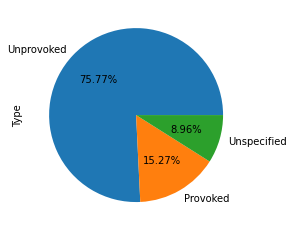

In [ ]:
df['Type'].value_counts().head(3).plot.pie(autopct='%1.2f%%')

In [ ]:
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def save_viz(barchart):
    os.chdir('/content/sample_data')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

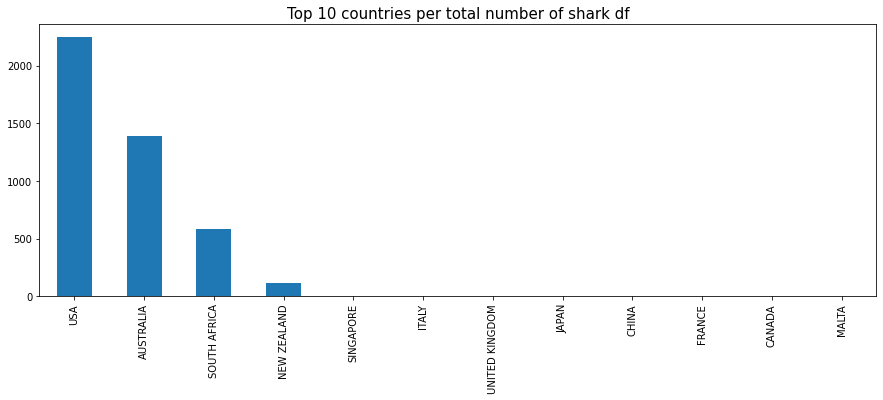

In [ ]:
sharks_country_chart=dfinal['Country'].value_counts().plot.bar(fontsize=10, figsize=(15, 5)).set_title('Top 10 countries per total number of shark df', fontsize=15)

title='Top 10 countries per total number of shark df'
save_viz(sharks_country_chart)